<a href="https://colab.research.google.com/github/chloecmin/AI-Contest_Prediction-Who-Will-Vote/blob/master/Modeling02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_x.csv')

## Preprocessing

In [ ]:
train.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

In [ ]:
train = train.drop(['index'], axis=1)
test = test.drop(['index'], axis=1)

### age_group 형변환

In [ ]:
train['age_group'].unique()

array(['30s', '20s', '40s', '50s', '10s', '60s', '+70s'], dtype=object)

In [ ]:
train['age_group'] = train['age_group'].str.extractall(r'(\d+)')[0].unstack().astype(int)
test['age_group'] = test['age_group'].str.extractall(r'(\d+)')[0].unstack().astype(int)

### gender 형변환

In [ ]:
train['gender'] = train['gender'].map({'Male': 0, 'Female': 1})
test['gender'] = test['gender'].map({'Male': 0, 'Female': 1})

### race 형변환

In [ ]:
test['race'].unique()

array(['White', 'Other', 'Asian', 'Native American', 'Arab', 'Black',
       'Indigenous Australian'], dtype=object)

In [ ]:
train['race'] = train['race'].map({'Asian': 0, 
                                   'Arab': 1, 
                                   'Black': 2, 
                                   'Indigenous Australian': 3, 
                                   'Native American': 4, 
                                   'White': 5, 
                                   'Other': 6})

test['race'] = test['race'].map({'Asian': 0, 
                                 'Arab': 1, 
                                 'Black': 2, 
                                 'Indigenous Australian': 3, 
                                 'Native American': 4, 
                                 'White': 5, 
                                 'Other': 6})

### religion 형변환

In [ ]:
train['religion'].unique()

array(['Other', 'Hindu', 'Agnostic', 'Atheist', 'Christian_Other',
       'Christian_Catholic', 'Muslim', 'Buddhist', 'Christian_Protestant',
       'Jewish', 'Christian_Mormon', 'Sikh'], dtype=object)

In [ ]:
train['religion'] = train['religion'].map({"Agnostic": 0, 
                                           "Atheist": 1, 
                                           "Buddhist": 2, 
                                           "Christian_Catholic": 3, 
                                           "Christian_Mormon": 4, 
                                           "Christian_Protestant": 5, 
                                           "Christian_Other": 6, 
                                           "Hindu": 7, 
                                           "Jewish": 8, 
                                           "Muslim": 9, 
                                           "Sikh": 10, 
                                           "Other": 11})

test['religion'] = test['religion'].map({"Agnostic": 0, 
                                         "Atheist": 1, 
                                         "Buddhist": 2, 
                                         "Christian_Catholic": 3, 
                                         "Christian_Mormon": 4, 
                                         "Christian_Protestant": 5, 
                                         "Christian_Other": 6, 
                                         "Hindu": 7, 
                                         "Jewish": 8, 
                                         "Muslim": 9, 
                                         "Sikh": 10, 
                                         "Other": 11})

In [ ]:
train[['age_group', 'gender', 'race', 'religion']].head()

,age_group,gender,race,religion
0,30,1,5,11
1,20,1,0,7
2,30,0,5,11
3,20,1,0,7
4,20,0,5,0


In [ ]:
test[['age_group', 'gender', 'race', 'religion']].head()

,age_group,gender,race,religion
0,10,0,5,5
1,10,0,6,3
2,30,0,6,6
3,60,0,5,3
4,10,0,5,0


### familysize 전처리

In [ ]:
train['familysize'].value_counts()

2             17918
3             11256
1              6535
4              4907
5              1962
0              1217
6               838
7               387
8               221
9               126
10               59
11               39
12               21
13               11
14                9
15                8
44                3
17                3
21                2
16                2
20                2
999               1
100               1
34                1
18                1
2147483647        1
30                1
Name: familysize, dtype: int64

In [ ]:
median = train['familysize'].median()
train['familysize'] = np.where(train['familysize'] >= 10, median, train['familysize'])

## TIME 전처리

In [ ]:
train['time_sum'] = round(train.QaE/train.QaA.mean() + train.QbE/train.QbA.mean() + train.QcE/train.QcA.mean() + train.QdE/train.QdA.mean() + train.QeE/train.QeA.mean() + train.QfE/train.QfA.mean() + train.QgE/train.QgA.mean() + train.QhE/train.QhA.mean() +train.QiE/train.QiA.mean() + train.QjE/train.QjA.mean() + train.QkE/train.QkA.mean() + train.QlE/train.QlA.mean() + train.QmE/train.QmA.mean() + train.QnE/train.QnA.mean() + train.QoE/train.QoA.mean() + train.QpE/train.QpA.mean() + train.QqE/train.QqA.mean() + train.QrE/train.QrA.mean() + train.QsE/train.QsA.mean() + train.QtE/train.QtA.mean(), 2)

## 시각화

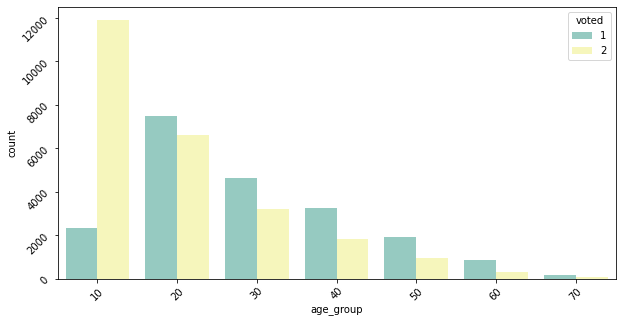

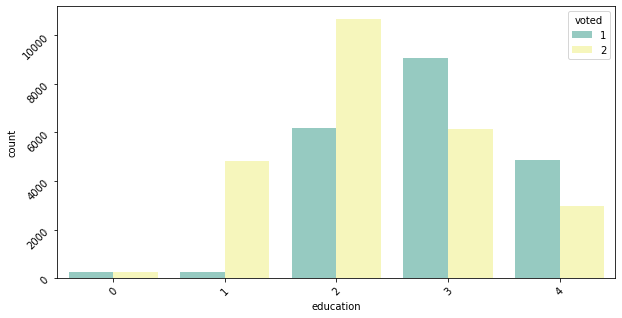

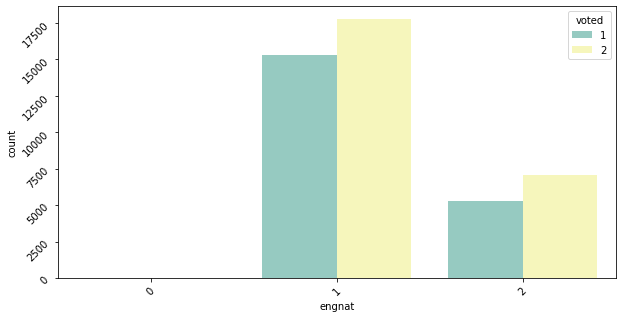

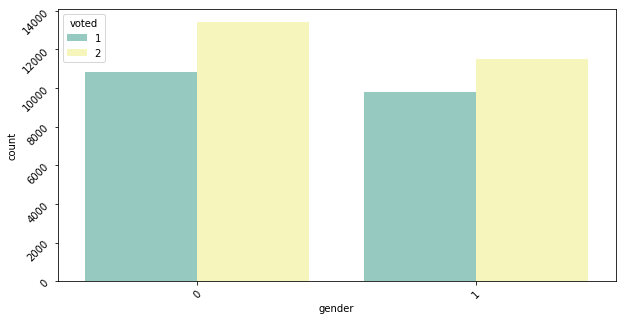

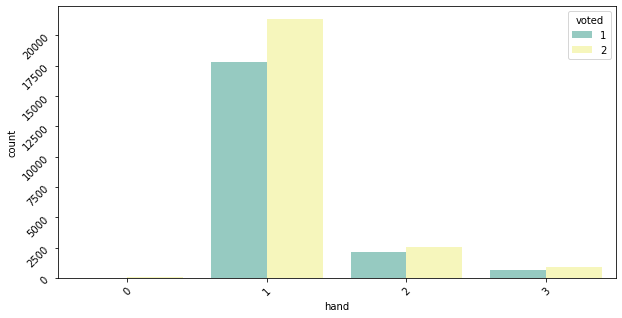

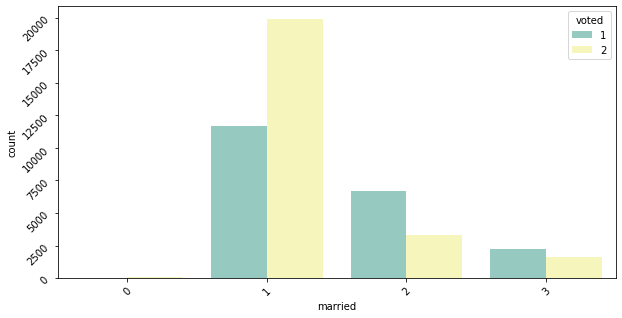

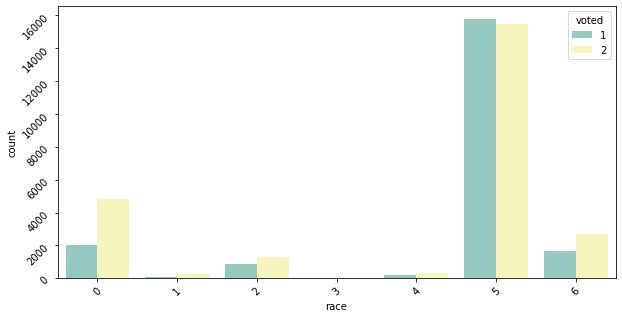

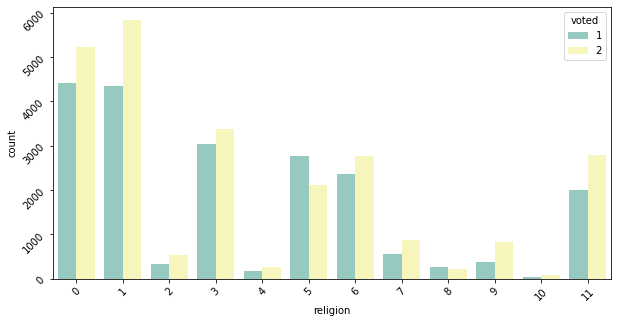

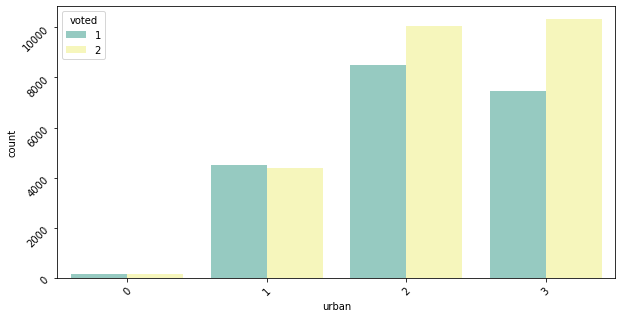

In [ ]:
lis=['age_group', 'education', 'engnat', 'gender', 'hand', 'married', 'race', 'religion','urban']

for i in lis:
    plt.figure(figsize=(10,5))
    plt.tick_params(rotation=45)
    sns.countplot(x=f'{i}',hue='voted',palette='Set3',data=train)
    plt.savefig(f'{i}.png')

## Feature Engineering

### 스코어 계산

In [ ]:
Qs = train.columns[:40:2]

train[Qs] = 6 - train[Qs]
test[Qs] = 6 - test[Qs]

train['Score'] = train[Qs].mean(axis = 1)
test['Score'] = test[Qs].mean(axis = 1)

In [ ]:
test.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Score
0,3.0,736,4.0,2941,3.0,4621,5.0,4857,4.0,2550,2.0,3171,1.0,3613,4.0,1494,2.0,1597,4.0,8891,1.0,2416,3.0,2043,3.0,3445,1.0,1232,3.0,1152,2.0,1447,3.0,798,2.0,1054,5.0,3462,4.0,1621,10,2,2,3,0,1,1,5,5,2,1,1,4,1,2,2,3,4,4,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,2.95
1,3.0,514,4.0,1952,3.0,1552,3.0,821,2.0,1150,5.0,605,4.0,601,5.0,2370,1.0,2268,3.0,1759,1.0,771,1.0,1124,3.0,4525,5.0,559,4.0,988,3.0,1014,2.0,380,1.0,995,3.0,629,2.0,708,10,2,2,2,0,2,1,6,3,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.90
2,3.0,500,4.0,2507,2.0,480,4.0,614,4.0,1326,4.0,767,5.0,799,5.0,1309,4.0,3317,2.0,766,2.0,1940,1.0,926,2.0,568,4.0,608,1.0,669,3.0,2417,3.0,710,2.0,2781,3.0,1110,1.0,1073,30,3,2,7,0,1,2,6,6,6,2,3,0,6,1,2,2,4,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,2.95
3,5.0,669,5.0,1050,1.0,1435,4.0,2252,1.0,2533,5.0,578,5.0,742,5.0,2886,5.0,1379,5.0,1392,3.0,2855,1.0,697,2.0,573,5.0,412,4.0,1076,2.0,1445,1.0,1069,5.0,847,2.0,1126,5.0,1240,60,4,1,4,0,1,2,5,3,0,5,1,6,0,6,0,5,1,6,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,3.55
4,4.0,499,5.0,1243,1.0,845,4.0,1666,4.0,925,4.0,413,1.0,361,5.0,995,4.0,1427,3.0,1093,1.0,1201,2.0,1264,4.0,943,2.0,475,4.0,787,2.0,607,3.0,529,2.0,947,2.0,524,3.0,1945,10,2,1,3,0,1,1,5,0,6,1,2,2,3,0,5,2,4,3,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,3.00


wf/wr

In [ ]:
train['train_wf']=train[['wf_01','wf_02','wf_03']].sum(axis=1)
train['train_wr']=train[['wr_01','wr_02','wr_03','wr_04','wr_05','wr_06','wr_07','wr_08','wr_09','wr_10','wr_11','wr_12','wr_13']].sum(axis=1)

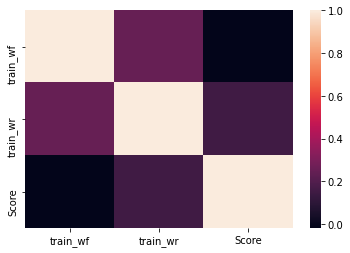

In [ ]:
sns.heatmap(train[['train_wf','train_wr','Score']].corr())

In [ ]:
train['wf_std']=(train.train_wf-train.train_wf.mean())/np.std(train.train_wf)
train['wr_std']=(train.train_wr-train.train_wr.mean())/np.std(train.train_wr)
train['wf_wr_sum']=train['wf_std']+train['wr_std']

NameError: ignored

#### 스코어 상관계수

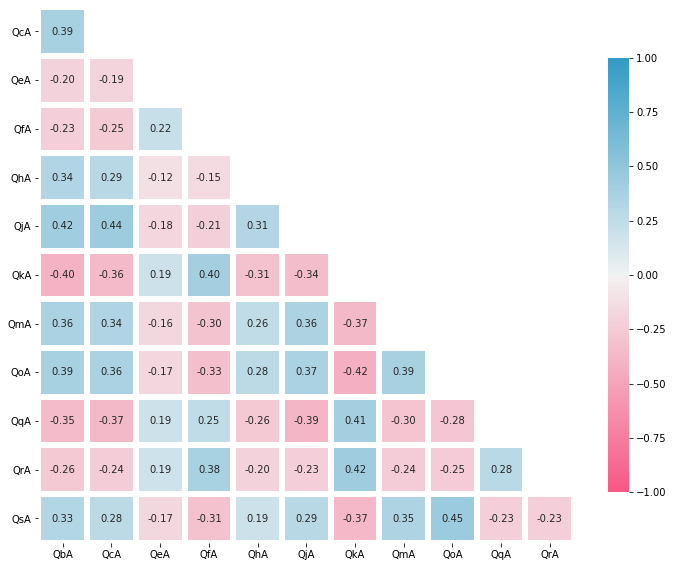

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))

corr_df = train[['QbA','QcA','QeA','QfA','QhA','QjA','QkA','QmA','QoA','QqA','QrA','QsA']].corr()
mask = np.triu(np.ones_like(corr_df, dtype=np.bool))
mask = mask[1:, :-1]
corr = corr_df.iloc[1:, :-1].copy()

cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", linewidths=5, cmap=cmap, vmin=-1, vmax=1, cbar_kws={"shrink": .8}, square=True)

yticks = [i for i in corr.index]
xticks = [i for i in corr.columns]

plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)

plt.show()

### 카이제곱 검정

In [ ]:
from scipy.stats import chi2_contingency
import scipy.stats

for i in lis:
    q = train.groupby(i)['voted'].value_counts().unstack()
    chi, p, dof, expected = chi2_contingency(q)
    
    if p <= 0.05:
       print(f"chi 스퀘어 값: {chi}",
             f"p-value (0.05): {p}",
             f"자유도 수: {dof}",
             f"기대값: \n{pd.DataFrame(expected)}",
             f"측정값: \n{q}", sep="\n")

chi 스퀘어 값: 7475.454986387315
p-value (0.05): 0.0
자유도 수: 6
기대값: 
             0            1
0  6441.893833  7773.106167
1  6395.216727  7716.783273
2  3551.085478  4284.914522
3  2288.990907  2762.009093
4  1309.224853  1579.775147
5   541.091891   652.908109
6   106.496310   128.503690
측정값: 
voted         1      2
age_group             
10         2314  11901
20         7484   6628
30         4614   3222
40         3243   1808
50         1936    953
60          870    324
70          173     62
chi 스퀘어 값: 5988.477710918697
p-value (0.05): 0.0
자유도 수: 4
기대값: 
             0            1
0   239.276816   288.723184
1  2305.758412  2782.241588
2  7629.214399  9205.785601
3  6900.507731  8326.492269
4  3559.242643  4294.757357
측정값: 
voted         1      2
education             
0           252    276
1           253   4835
2          6179  10656
3          9083   6144
4          4867   2987
chi 스퀘어 값: 43.94729348940214
p-value (0.05): 2.8639568574327355e-10
자유도 수: 2
기대값: 
              0  

## 모델링

In [ ]:
train

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Score
0,3.0,363,2.0,1370,1.0,997,5.0,1024,4.0,1577,1.0,539,4.0,586,2.0,1095,1.0,1142,2.0,1287,2.0,883,2.0,851,4.0,851,1.0,816,4.0,579,4.0,924,4.0,366,4.0,876,4.0,633,5.0,1115,30,2,1,4.0,1,1,3,5,11,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,2.95
1,1.0,647,1.0,1313,3.0,3387,1.0,2969,5.0,4320,3.0,2190,5.0,826,5.0,4082,1.0,1867,3.0,1264,1.0,2943,2.0,3927,5.0,4329,1.0,1828,5.0,1214,1.0,2414,1.0,1356,5.0,3039,2.0,4304,5.0,1346,20,4,2,3.0,1,1,1,0,7,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,2.80
2,2.0,1623,5.0,1480,5.0,1021,2.0,3374,1.0,1333,5.0,531,2.0,1167,5.0,1016,3.0,2653,4.0,1569,1.0,998,1.0,2547,4.0,918,2.0,2153,4.0,1304,5.0,1131,1.0,937,2.0,1327,5.0,1170,5.0,1409,30,3,1,3.0,0,1,2,5,11,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,3.20
3,3.0,504,3.0,2311,2.0,992,3.0,3245,5.0,357,4.0,1519,2.0,159,3.0,2275,1.0,2809,2.0,5614,3.0,3219,2.0,1296,2.0,9046,2.0,1216,2.0,1169,2.0,23868,3.0,581,2.0,8830,2.0,2392,1.0,1312,20,4,2,0.0,1,1,1,0,7,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,2.45
4,5.0,927,5.0,707,1.0,556,4.0,1062,5.0,1014,4.0,628,5.0,991,5.0,1259,1.0,1153,1.0,1388,1.0,740,1.0,1181,2.0,547,4.0,575,5.0,754,2.0,1140,1.0,323,1.0,1070,5.0,583,4.0,1889,20,3,1,2.0,0,1,2,5,0,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,3.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,4.0,1050,1.0,619,2.0,328,5.0,285,5.0,602,5.0,267,5.0,315,5.0,483,5.0,1016,2.0,278,2.0,611,1.0,215,2.0,388,5.0,299,4.0,1915,2.0,439,4.0,823,5.0,309,1.0,586,2.0,2252,10,2,1,1.0,1,3,1,5,8,1,2,6,1,2,6,3,0,6,4,3,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,3.35
45528,4.0,581,3.0,1353,2.0,1164,5.0,798,3.0,1680,4.0,560,4.0,640,5.0,1415,4.0,4494,1.0,1392,4.0,2478,1.0,1268,3.0,843,4.0,1401,2.0,1524,2.0,719,4.0,754,3.0,1118,2.0,654,2.0,1197,30,2,1,2.0,0,1,1,5,1,2,2,2,3,1,3,3,4,1,5,1,2,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,3.10
45529,2.0,593,5.0,857,5.0,1047,2.0,1515,1.0,1690,2.0,1253,1.0,1094,5.0,1283,1.0,2209,5.0,1764,1.0,1062,1.0,1489,5.0,1908,2.0,891,5.0,1298,5.0,1200,1.0,473,1.0,1779,3.0,1355,5.0,667,10,2,1,1.0,1,1,1,5,6,4,4,2,4,0,1,0,2,1,6,2,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,2.90
45530,5.0,747,3.0,1331,2.0,892,4.0,1281,5.0,1328,5.0,599,5.0,650,5.0,1429,1.0,1748,5.0,770,1.0,1025,1.0,742,2.0,4180,3.0,707,5.0,489,5.0,913,2.0,1301,2.0,1680,2.0,737,5.0,1124,40,4,1,2.0,0,3,1,5,1,1,2,0,4,0,1,3,2,2,4,0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,3.40


In [ ]:
cols = ['age_group', 'education', 'engnat', 'familysize', 'gender', 'hand', 'married', 'race', 'religion', 'urban', 'Score', 'voted']
new_train = train[cols]
new_test = test[cols[:-1]]

In [ ]:
y_train = new_train['voted']
x_train = new_train.drop('voted', axis=1)

### 교차검증
* 10 개의 분류 모델들을 Stratified K-Fold를 사용하여 교차 검증

In [ ]:
kfold = StratifiedKFold(n_splits=10)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


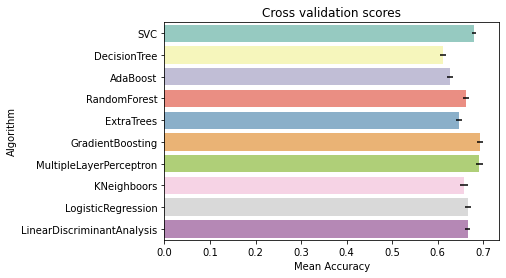

In [ ]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, x_train, y_train, scoring="accuracy", cv=kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,
                       "CrossValerrors": cv_std, 
                       "Algorithm": ["SVC", "DecisionTree", "AdaBoost",
                                     "RandomForest", "ExtraTrees", "GradientBoosting", 
                                     "MultipleLayerPerceptron", "KNeighboors", "LogisticRegression",
                                     "LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans", "Algorithm",
                data=cv_res,
                palette="Set3",
                orient="h",
                **{'xerr':cv_std})

g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
g.figure.savefig("cross_validations.png")

### 메타 모델링
* Grid Search를 이용하여 모델들의 파라미터 튜닝

#### AdaBoost

In [ ]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)
ada_param_grid = {"base_estimator__criterion": ["gini", "entropy"],
                 "base_estimator__splitter": ["best", "random"],
                 "algorithm": ["SAMME","SAMME.R"],
                 "n_estimators": [1,2],
                 "learning_rate": [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC, param_grid=ada_param_grid,
                        cv=kfold, scoring="accuracy",
                        n_jobs= 4, verbose=1)

gsadaDTC.fit(x_train, y_train)
ada_best = gsadaDTC.best_estimator_

In [ ]:
gsadaDTC.best_score_

#### Extra Trees 

In [ ]:
ExtC = ExtraTreesClassifier()
ex_param_grid = {"max_depth": [None],
                 "max_features": [1, 3, 10],
                 "min_samples_split": [2, 3, 10],
                 "min_samples_leaf": [1, 3, 10],
                 "bootstrap": [False],
                 "n_estimators": [100,300],
                 "criterion": ["gini"]}

gsExtC = GridSearchCV(ExtC, param_grid=ex_param_grid, 
                      cv=kfold, scoring="accuracy",
                      n_jobs= 4, verbose = 1)

gsExtC.fit(x_train, y_train)
ExtC_best = gsExtC.best_estimator_

gsExtC.best_score_

#### Random Forest

In [ ]:
RFC = RandomForestClassifier()

rf_param_grid = {"max_depth": [None],
                "max_features": [1, 3, 10],
                "min_samples_split": [2, 3, 10],
                "min_samples_leaf": [1, 3, 10],
                "bootstrap": [False],
                "n_estimators": [100,300],
                "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC, param_grid=rf_param_grid, 
                     cv=kfold, scoring="accuracy",
                     n_jobs= 4, verbose = 1)

gsRFC.fit(x_train, y_train)
RFC_best = gsRFC.best_estimator_

gsRFC.best_score_

#### Graident Boosting

In [ ]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
                'n_estimators': [100,200,300],
                'learning_rate': [0.1, 0.05, 0.01],
                'max_depth': [4, 8],
                'min_samples_leaf': [100,150],
                'max_features': [0.3, 0.1]}

gsGBC = GridSearchCV(GBC, param_grid=gb_param_grid,
                     cv=kfold, scoring="accuracy",
                     n_jobs= 4, verbose = 1)

gsGBC.fit(x_train, y_train)
GBC_best = gsGBC.best_estimator_

gsGBC.best_score_

### 학습 커브 시각화

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("training examples")
    plt.ylabel("score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="cross-validation score")
    
    plt.legend(loc="best")
    return plt

In [ ]:
g = plot_learning_curve(gsRFC.best_estimator_, "Random Forest learning curves", x_train, y_train, cv=kfold)
g.savefig("random_forest.png")

In [ ]:
g = plot_learning_curve(gsExtC.best_estimator_, "ExtraTrees learning curves", x_train, y_train, cv=kfold)
g.savefig("extra_trees.png")

In [ ]:
g = plot_learning_curve(gsGBC.best_estimator_, "GradientBoosting learning curves", x_train, y_train, cv=kfold)
g.savefig("gradient_boosting.png")

In [ ]:
g = plot_learning_curve(gsExtC.best_estimator_, "AdaBoost learning curves", x_train, y_train, cv=kfold)
g.savefig("adaboost.png")

In [ ]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best), ("AdaBoost", ada_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

plt.show()

In [ ]:
test_Voted_RFC = pd.Series(RFC_best.predict(new_test), name="RFC")
test_Voted_AdaC = pd.Series(ada_best.predict(new_test), name="Ada")
test_Voted_ExtC = pd.Series(ExtC_best.predict(new_test), name="ExtC")
test_Voted_GBC = pd.Series(GBC_best.predict(new_test), name="GBC")

ensemble_results = pd.concat([test_Voted_RFC, test_Voted_ExtC, test_Voted_AdaC, test_Voted_GBC], axis=1)

### 모델 간의 상관계수 시각화

In [ ]:
import warnings
import platform
from matplotlib import font_manager, rc

warnings.filterwarnings("ignore")

if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
matplotlib.rcParams['axes.unicode_minus']=False

corr_df=ensemble_results.corr()
fig, ax = plt.subplots()

mask = np.triu(np.ones_like(corr_df, dtype=np.bool))
mask = mask[1:, :-1]
corr = corr_df.iloc[1:, :-1].copy()

cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", linewidths=5, cmap=cmap, vmin=0.3, vmax=1.0, cbar_kws={"shrink": .8}, square=True)

yticks = [i for i in corr.index]
xticks = [i for i in corr.columns]

plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)

plt.savefig("correlation.png")
plt.show()

### 모델 테스트

In [ ]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best), ('gbc',GBC_best)], 
                           voting='soft', n_jobs=4)
votingC = votingC.fit(X_train, Y_train)

In [ ]:
prediction = votingC.predict(new_test)
temp = pd.read_csv("test_x.csv")

submission = pd.DataFrame({"index": temp['index'],
                           "voted": prediction})
submission.to_csv("submission.csv", index=False)

### 모델 저장

In [ ]:
with open('gsadaDTC.pkl', 'wb') as f:
    pickle.dump(gsadaDTC, f)
    
with open('gsExtC.pkl', 'wb') as f:
    pickle.dump(gsExtC, f)
    
with open('gsRFC.pkl', 'wb') as f:
    pickle.dump(gsRFC, f)
    
with open('gsGBC.pkl', 'wb') as f:
    pickle.dump(gsGBC, f)